# SVM Fitting Example

### Imports and set seed for reproducibility

In [1]:
import random
import numpy as np

# Set the random seed for reproducibility.
seed = 16
random.seed(seed)
np.random.seed(seed)

In [2]:
import matplotlib.pyplot as plt
from ado import SVM
from sklearn.datasets import make_blobs

### Generate synthetic data

In [3]:
# Create a synthetic dataset made by two clusters of 40 data points in total,
# with 20 data points having label 1 and 20 data points having label -1.

n_samples = 40
X, y = make_blobs(n_samples=n_samples, centers=2,
                  random_state=seed, cluster_std=2.0)
y[y == 0] = -1

### Fit the model on the synthetic data by using different kernels

AttributeError: 'ado.SVM' object has no attribute 'prob'

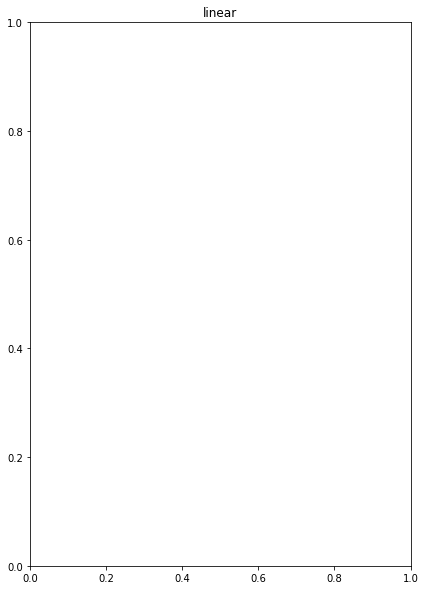

In [5]:
# Define the two types of kernel: linear and radial basis function.
kernel_list = ["linear", "rbf"]

plt.figure(figsize=(15,10))

for idx, k_type in enumerate(kernel_list):
    plt.subplot(1, 2, idx + 1)
    plt.title(str(k_type))

    # Fit the SVM on the synthetic data.
    opt = SVM(C=1.0, tol=1e-4, kernel=k_type, max_steps=1000, seed=seed, sigma=5)
    opt.fit(X, y)

    # Create a a grid of data points on which running inference in order to obtain
    # a dense decision plane.
    margin = 2
    k = np.linspace(np.min(X) - margin, np.max(X) + margin, num=n_samples)
    xx, yy = np.meshgrid(k, k)
    K = np.stack([xx.flatten(), yy.flatten()], axis=1)

    # Run inference on the grid.
    M = opt.prob(K).reshape((len(k), len(k)))

    plt.imshow(M, extent=[np.min(X) - margin, np.max(X) + margin, np.min(X) - margin, np.max(X) + margin],
               origin='lower',
               cmap='inferno')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='gist_yarg')


plt.show()